In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
data = mnist.load_data()

In [13]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils as np_utils

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

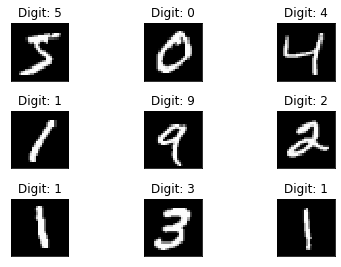

In [15]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [16]:
#lets, print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

#building the input vector from the 28 * 28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize the data to help with the training
X_train /=255
X_test /=255

#print the final input shape ready for training
print("train matrix shape", X_train.shape)
print("test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
train matrix shape (60000, 784)
test matrix shape (10000, 784)


In [17]:
#one hot encoding using keras' numpy related utilites
n_classes = 10
print("shape before one hot encoding: ",y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("shape after one hot encoding: ",Y_train.shape)


shape before one hot encoding:  (60000,)
shape after one hot encoding:  (60000, 10)


In [18]:
model = Sequential()

#1st hidden layer
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

#2nd hidden layer
model.add(Dense(784,))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

#3rd hidden layer
model.add(Dense(128,))
model.add(Activation('relu'))
#model.add(Dropout(0.4))

#output layer
model.add(Dense(10))
model.add(Activation('softmax'))


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 784)               402192    
_________________________________________________________________
activation_5 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [22]:
#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [23]:
#training the model and saving matrices in history
history = model.fit(X_train, Y_train,
                    batch_size=128, epochs=20,
                    verbose=2,
                    validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 4s - loss: 1.0468 - accuracy: 0.7596 - val_loss: 0.4530 - val_accuracy: 0.8848
Epoch 2/20
469/469 - 1s - loss: 0.3933 - accuracy: 0.8924 - val_loss: 0.3283 - val_accuracy: 0.9068
Epoch 3/20
469/469 - 1s - loss: 0.3170 - accuracy: 0.9108 - val_loss: 0.2826 - val_accuracy: 0.9204
Epoch 4/20
469/469 - 1s - loss: 0.2802 - accuracy: 0.9203 - val_loss: 0.2562 - val_accuracy: 0.9285
Epoch 5/20
469/469 - 1s - loss: 0.2550 - accuracy: 0.9276 - val_loss: 0.2360 - val_accuracy: 0.9314
Epoch 6/20
469/469 - 1s - loss: 0.2351 - accuracy: 0.9334 - val_loss: 0.2202 - val_accuracy: 0.9356
Epoch 7/20
469/469 - 1s - loss: 0.2186 - accuracy: 0.9381 - val_loss: 0.2056 - val_accuracy: 0.9399
Epoch 8/20
469/469 - 1s - loss: 0.2044 - accuracy: 0.9416 - val_loss: 0.1977 - val_accuracy: 0.9429
Epoch 9/20
469/469 - 1s - loss: 0.1920 - accuracy: 0.9454 - val_loss: 0.1843 - val_accuracy: 0.9459
Epoch 10/20
469/469 - 1s - loss: 0.1804 - accuracy: 0.9491 - val_loss: 0.1790 - val_accuracy: 0.9471

In [24]:
loss_and_matrics = model.evaluate(X_test, Y_test, verbose=2)

print("test loss", loss_and_matrics[0])
print("test accuracy", loss_and_matrics[1])


313/313 - 0s - loss: 0.1174 - accuracy: 0.9662
test loss 0.11735192686319351
test accuracy 0.9661999940872192
